# Les bases du machine learning

## Introduction
Dans cette pratique, nous introduisons l'idée de la classification (classer des choses en catégories) à l'aide d'un modèle d'apprentissage automatique. Nous explorons la relation entre les paramètres d'un classifieur et la frontière de décision (une ligne séparant les catégories) et introduisons également l'idée d'une fonction de perte. Enfin, nous introduisons brièvement Tensorflow.

## Objectifs d'apprentissage
* Comprendre l'idée de ** classification **
* Comprendre le concept de  ** séparabilité linéaire** d'un jeu de données.
* Comprendre ce que sont les ** paramètres ** d'un classificateur et leur lien avec la ** frontière de décision **
* Être capable d'expliquer brièvement ** Tensorflow **.

In [0]:
#@title [Execute moi!] Importation des librairies { display-mode: "form" }
!pip install -q moviepy
!pip install -q imageio
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np                 # Numpy est une bibliothèque d'algèbre linéaire efficace.
import matplotlib.pyplot as plt    # Matplotlib est utilisé pour générer des graphiques sur des données.
from matplotlib import animation, rc

from IPython import display

try:
  tf.enable_eager_execution()
  print('Execution immédiat')
except ValueError:
  print('Déja en mode execution immédiat, tu es dans le monde libre :)')
  
tfe = tf.contrib.eager

Execution immediat


## PLAN
Dans cette session, nous nous attaquons à la tâche de ** classification ** d'un jeu de données simple et synthétique. La classification dans l'apprentissage automatique implique l'apprentissage d'une (ou plusieurs) catégories distinctes à des observations. Cela diffère d'une autre tâche courante dans l'apprentissage automatique appelée ** régression **, qui consiste à apprendre une correspondance entre des entrées et une sortie à valeur continue.

1. Nous commençons par introduire un ensemble de données synthétiques de points rouges et bleus que nous souhaitons séparer(classification)
2. Nous introduisons et explorons l'idée de ** séparabilité linéaire **
3. Nous définissons une ** perte ** comme une mesure de la qualité d'un séparateur d'une ligne particulière
4. Nous présentons brièvement TensorFlow et montrons comment l'utiliser pour rechercher automatiquement le minimum d'une fonction de perte.

In [0]:
#@title [EXECUTE MOI!] Fonction pour affichage de graphiques { display-mode: "form" }
def plot_dataset(inputs, labels):
  #Tracer les entrées 2D et les étiquettes données à l'aide de Matplotlib.   
  plt.scatter(
      inputs[:, 0], inputs[:, 1], 
      c=['red' if label > 0 else 'blue' for label in labels])

  plt.axis('equal')

  plt.xlabel('x1')
  plt.ylabel('x2')

## Le jeu de données

Exécutez le code dans la cellule ci-dessous, et regardez le tracé résultant. Il doit produire un ensemble de données 2D simple composé de 2 classes de points, les classes sont représentées par des couleurs bleus et rouges. Notre tâche est de construire un **classifieur binaire** qui peut distinguer les points rouges et bleus (le rouge et le bleu sont appelés les **classes** des points), en utilisant seulement les coordonnées 2-D d'un point. En d'autres termes, nous voulons une fonction qui prend en entrée un vecteur 2D représentant les coordonnées d'un point et retourne une valeur de 1 ou 0 indiquant si le point est rouge ou bleu. Nous avons ici **encodé** les couleurs rouge et bleu dans les chiffres 1 et 0 (ce qui facilite le travail en mathématiques et le code !)

Note : nous avons arbitrairement encodé le rouge comme 1 et le bleu comme 0, vous pouvez le faire dans l'autre sens aussi longtemps que vous êtes constant !

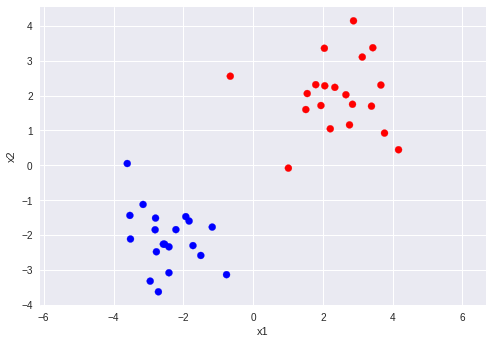

In [0]:
#@title Générer le jeu de données  {run: "auto"}
# Définir le(s) centre(s) des distributions normales
centre = 1.9   #@param {type:"slider", min:0, max:2, step:0.1}

points_in_class = 20  # Combien de points nous voulons par classe

# Une graine aléatoire fixe est une "astuce" souvent utilisée en ML qui nous permet de recréer
# les mêmes données quand il y a un élément aléatoire impliqué. 
np.random.seed(0)  

# Générer des points aléatoires dans la classe "rouge"
red_inputs = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])     

# Générer des points aléatoires dans la classe "bleu"
blue_inputs = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2]) 

# Mettons les deux groupes de points ensemble(=>jeu de données)
inputs = np.concatenate((red_inputs, blue_inputs), axis=0) 
    
# La classe (étiquette) est 1 pour le rouge ou 0 pour le bleu
red_labels = np.ones(points_in_class)    
blue_labels = np.zeros(points_in_class)
labels = np.concatenate((red_labels, blue_labels), axis=0)

# num_data_points est la taille totale du jeu de données
num_data_points = 2 * points_in_class 

plot_dataset(inputs, labels)

# Pourquoi cette separation est aussi jolie ?

###À quoi ressemblent les données ? 
Les entrées sont des vecteurs bidimensionnels (points dans un espace 2D). Voici les coordonnées de 4 points, que nous avons délibérément choisis pour que les points 1 et 2 soient "rouges" et les points 3 et 4 "bleus". 

In [0]:
print('Input 1:\t', inputs[0])
print('Input 2:\t', inputs[1])

print('Input 3:\t', inputs[-1])
print('Input 4:\t', inputs[-2])

Input 1:	 [2.36405235 1.00015721]
Input 2:	 [1.57873798 2.8408932 ]
Input 3:	 [-0.91155253 -0.54383466]
Input 4:	 [-1.47079715 -1.17884966]


Les labels sont 0 ou 1. Voici les labels correspondant aux points ci-dessus :

In [0]:
print('Label 1:\t', labels[0])
print('Label 2:\t', labels[1])

print('Label 3:\t', labels[-1])
print('Label 4:\t', labels[-2])

Label 1:	 1.0
Label 2:	 1.0
Label 3:	 0.0
Label 4:	 0.0


#### Bonus : Autres exemples de problèmes de classification binaire

Dans cette session, nous utilisons un ensemble de données synthétiques où nous avons 2 classes de points 2D qui proviennent de différentes distributions, distinguées par les couleurs, rouge et bleu. Pour rendre cela plus concret, voici quelques exemples de problèmes de classification binaire plus réels.

#### Question pour discussion
Pour chacun des exemples ci-dessus, donnez les entrées et les labels

* Déterminez si un message électronique  est SPAM ou PAS SPAM.
* Déterminer si une image, représentée par ses valeurs de pixels codées est une image d'un CHIEN ou d'un CHAT.
* Déterminer si la consommation d'énergie d'un bâtiment augmentera ou diminuera  le mois prochain, en utilisant une série chronologique des valeurs de consommation d'énergie passées 


## Séparabilité linéaire

La séparabilité linéaire d'un ensemble de données D-dimensions avec 2 classes signifie qu'il existe une droite, plan ou hyperplan qui sépare les classes (un hyperplan est une généralisation d'une ligne droite à plusieurs dimensions). Dans ce cas, l'ensemble de données est bidimensionnel et **linéairement séparable** s'il est possible de tracer une ligne (1-D) entre les points rouge et bleu de sorte que tous les points rouges se trouvent d'un côté de la ligne et tous les points bleus de l'autre. 

#### Tâche exploratoire
Dans la cellule de code sous la rubrique "Le jeu de données", changez le curseur pour la valeur "centre". Ceci mettra automatiquement à jour la valeur dans le code et redessinera le tracé.

* quelle valeur du centre l'ensemble de données devient-il séparable linéairement ?


#### Question pour discussion
Pouvez-vous penser à des ensembles de données 2-D, 2 classes, similaires à celui ci-dessus, qui sont séparables (les points des 2 classes ne se chevauchent pas), mais qui ne sont pas **linéairement** séparables ? Dessinez quelques exemples sur papier ou tracez-les à l'aide de Matplotlib et discutez-en avec votre voisin et vos tuteurs. 



## Tracer la ligne(la frontiere de décision)

Comme vous vous en souvenez à l'école(ou pas), une ligne en 2 dimensions, avec les axes de coordonnées $x_1$ et $x_2$, qui passe par l'origine (0, 0) peut être représentée par l'équation $w_1x_1 + w_2x_2 = 0$

Nous pouvons aussi écrire ceci sous forme vectorielle comme : $\mathbf{w}^T\mathbf{x} = 0$, where $\mathbf{w}^T = [w_1, w_2]$ and $\mathbf{x}^T = [x_1, x_2]$.

Lorsqu'une ligne (ou hyperplan) est définie de cette façon, on appelle les **paramètres**, $\mathbf{w} = (w_1, w_2)$ un **vecteur normal** pour cette ligne. Le vecteur normal est orthogonal (perpendiculaire) à la ligne. Nous voulons construire une telle ligne qui sépare les points rouges et bleus, que nous appellerons une **frontiere de décision**. 

Dans la cellule suivante, nous traçons notre ensemble de données avec un vecteur normal $\mathbf{w}$ et une frontiere de décision. Vous pouvez ajuster les valeurs de $w_1$ et $w_2$ en utilisant les curseurs à droite. Observez l'effet que les valeurs ont sur le vecteur normal dessiné en rouge* et la limite de décision en noir*. Ajustez les valeurs de façon à ce que la ligne noire sépare les points bleu et rouge (c'est-à-dire les points rouges d'un côté et bleus de l'autre). Votre ligne doit également avoir le vecteur normal pointant dans la direction des points rouges. La raison pour laquelle cette direction est importante est que nous voulons éventuellement **classifier** les points d'un côté de la ligne comme étant rouges et de l'autre comme étant bleus. 

Est-il possible de trouver une ligne à travers l'origine qui sépare parfaitement les points ?

**Note** : Chacune de nos entrées est un vecteur 2D, composé de deux valeurs de coordonnées. Nous appelons ces 2 axes les coordonnées $x_1$ et $x_2$. Par exemple, si nous avons une entrée $(1, 2)$, alors nous dirions $x_1 = 1$ et $x_2 = 2$ pour ce point.

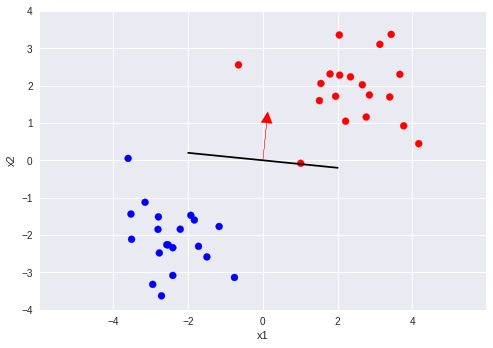

In [0]:
#@title Effet des paramètres {run: "auto"}

# Définir les paramètres
w1 = 0.1 #@param { type: "slider", min: -5, max: 5, step: 0.1 }
w2 = 1 #@param { type: "slider", min: -5, max: 5, step: 0.1 }

plot_dataset(inputs, labels)

# Ajoutez le vecteur des parametres au tracé. Nous le traçons en rouge, car il doit "pointer"
# dans la direction des points rouges.
ax = plt.axes()
ax.arrow(0, 0, w1, w2, head_width=0.3, head_length=0.3, fc='r', ec='r')

# Tracez une partie de la frontiere de décision en noir. Elle est orthogonale au vecteur normal.
t = 2
plt.plot([-t * w2, t * w2], [t * w1, -t * w1], 'k-')

plt.xlim([-4, 4])
plt.ylim([-4, 4])

plt.show()

## Classification
Étant donné un vecteur normal $\mathbf{w}$, nous pouvons évaluer de quel côté de la frontiere de décision un point particulier $\mathbf{x_i} = (x_{i,1}, x_{i, 2})$ se trouve en évaluant $\mathbf{w^Tx_i}$. Si $\mathbf{w^Tx_i} > 0$, le point $\mathbf{x_i}$ se trouve d'un côté de la frontière (dans la direction du vecteur normal), et nous pouvons classer ce point dans la classe 1 (dans notre cas, "rouge"). Si $\mathbf{w^Tx_i} < 0$, le point se trouve de l'autre côté et peut être classé dans la classe 0 (dans notre cas, "bleu"). Enfin, si $\mathbf{w^Tx_i} = 0$, le point se trouve sur la frontiere de décision et nous pouvons décider si nous devons la classer comme 0 ou 1, ou l'ignorer. 

## A quel point la ligne(frontiere de decision) est-elle "bonne" ?

Si vous avez joué avec le code ci-dessus, vous avez peut-être développé une certaine intuition sur la façon dont les différents réglages des paramètres influencent l'emplacement final de la frontiere de décision. Le but de l'apprentissage machine est d'ajuster *automatiquement* les valeurs de $w_1$ et $w_2$ pour trouver une frontiere de décision appropriée ! Mais pour ce faire, il faut spécifier mathématiquement une fonction de **perte** ou **objectif**. La perte est une fonction des paramètres $w_1$ et $w_2$ et nous indique dans quelle mesure une certaine configuration des valeurs des paramètres est bonne pour classer les données. Cette fonction est définie de telle sorte qu'elle atteigne son réglage optimal lorsqu'elle est minimisée, c'est-à-dire  plus sa valeur est *petite*, le *mieux* est la séparation entre les classes. Une propriété supplémentaire qu'une fonction de perte peut avoir et qui est souvent cruciale pour l'apprentissage machine est d'être *différentiable*. Une fonction de perte différentiable nous permet d'utiliser *l'optimisation basée sur les dérivées* pour trouver son minimum et les valeurs optimales correspondantes de $w_1$ et $w_2$. 

Pour ce problème de classification, nous considérons la fonction de perte **entropie  croisée binaire** pour mesurer la qualité des prédictions du modèle.  Cette fonction de perte compare la prédiction du modèle pour chaque exemple, $\mathbf{x_i}$ à la vraie **cible** $y_i$ (on appelle souvent la vraie étiquette associée à une entrée "label"). Il applique ensuite la fonction log (non linéaire) pour pénaliser le modèle parce qu'il est plus éloigné de la classe réelle. L'équation pour la perte d'entropie croisée binaire, sur un ensemble de données avec  $N$ points est :

\begin{align}
p(\mathbf{w}) = -\frac{1}{N}\sum_{i=1}^N y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i)
\end{align}

où $\hat{y}_i = \operatorname{sigmoid}(\mathbf{w}^T\mathbf{x_i})$ et la fonction  $\operatorname{sigmoid}$ est définie ainsi :

$$
\mathrm{sigmoid}(a) = \frac{1}{1 + e^{-a}} .
$$

La raison pour laquelle nous utilisons la fonction  $\operatorname{sigmoid}$ est que notre classifieur peut sortir n'importe quelle valeur réelle. La fonction de perte d'entropie croisée binaire, cependant, s'attend à ce que les prédictions faites par un classifieur se situent entre $0$ et $1$. La fonction  $\operatorname{sigmoid}$ "remplace" toutes les entrées de nombres réels pour se situer dans l'intervalle $(0,1)$.

Enveloppons maintenant ceci dans une fonction Python pour que nous puissions calculer la perte pour n'importe quelle valeur de $w_1$ et $w_2$ :



In [0]:
def compute_loss(w1, w2):
  
  total_log_likelihood = 0  
  
  # Ajouter la contribution de chaque point de données à la perte
  for (x1, x2), target in zip(inputs, labels):
    # Comme nos labels sont 0 ou 1, notre fonction de prédiction doit fournir une valeur entre 0 et 1.
    # La fonction sigmoïde'remplace' toute sortie par une valeure comprise entre 0 et 1 :
    prediction = tf.sigmoid(w1*x1 + w2*x2)  
    
    # Calculez la perte locale
    # Nous ajoutons 1e-10 pour rendre les opérations du log numériquement stables (c'est-à-dire éviter de prendre le log de 0.)
    log_likelihood = target * tf.log(prediction + 1e-10) + (1.-target)*tf.log(1.-prediction + 1e-10)
    total_log_likelihood += log_likelihood
  
  loss = -total_log_likelihood
  average_loss = loss / len(inputs)
  return average_loss

#### En savoir plus sur la fonction sigmoïde



La fonction sigmoid est definit ainsi
$$
\mathrm{sigmoid}(a) = \frac{1}{1 + e^{-a}} .
$$
Pouvez vous demontrer que
$$
1 - \mathrm{sigmoid}(a) = \frac{1}{1 + e^{a}} ,
$$
et les points suivants sur un papier?

* Quelle est sa valeur quand $a = \mathbf{w}^{T}\mathbf{x}$ est positif ? négatif ? et zéro ?
* Qu'arrive-t-il à sa valeur quand $a = \mathbf{w}^{T}\mathbf{x}$ devient plus grand ?
* Quelle est la valeur de $\mathrm{sigmoid}(\mathbf{w^Tx})$ quand $\mathbf{w}^T\mathbf{x} = 0$ ? En quoi cela change-t-il la façon dont nous classons les points de part et d'autre de la frontiere de décision ?

Après avoir répondu aux questions ci-dessus, expliquez à votre voisin pourquoi la fonction  de perte d'entropie binaire croisée a un sens. 

**INDICE *** : Rappelez-vous que l'idée de la fonction de perte est de retourner de petites valeurs lorsque le classifieur fait de bonnes prédictions et de grandes valeurs lorsque le classifieur fait de mauvaises prédictions. 

#### Question bonus
Nous avons dérivé la fonction `compute_loss()` ci-dessus basée sur la minimisation de la perte log-loss de l'erreur de prédiction. Ceci est lié à un concept appelé 'cross-entropy'. Mais une autre façon de dériver exactement la même fonction de perte est de maximiser la probabilité des données sous le modèle $P(y | x, w_1, w_2)$. Si vous êtes familier avec ce concept (par exemple à partir de statistiques), voyez si vous pouvez le déduire de cette façon également.

## Valeur de la fonction de perte pour les $w_1$ et $w_2$ que vous avez choisis


La ligne de code suivante calcule la valeur de perte pour les valeurs $w_1$ et $w_2$ que vous avez choisies. Essayez de changer les valeurs de $w_1$ et $w_2$ en utilisant les curseurs ci-dessus et reexecuter la ligne ci-dessous. Pouvez-vous voir comment une meilleure séparation se traduit par une perte moindre ? 

Remarque : Si vous avez déjà utilisé TensorFlow auparavant, le fonctionnement de cette cellule de code peut prêter à confusion ! Nous vous en dirons plus à ce sujet plus tard.... 

In [0]:
compute_loss(w1, w2).numpy()

0.1344592384871101

## Visualisation de la fonction de perte

Nous pouvons visualiser la fonction de perte pour notre ensemble de données en traçant sa valeur à chaque point d'une grille entière de valeurs de paramètres $w_1$ et $w_2$. Pour ce faire, nous utilisons un **graphique de contour**, qui est une technique permettant de visualiser une fonction 3D sur un graphique 2D en laissant la couleur représenter la troisième dimension. Tous les points de la même couleur ont la même valeur de perte. 

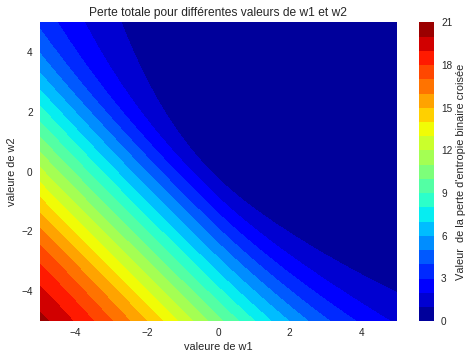

In [0]:
# Nous définissons une fonction pour pouvoir réutiliser ce code plus tard
def plot_contours():  
  # Générer tout un tas de points (w1, w2) dans une grille
  ind = np.linspace(-5, 5, 50)
  w1grid, w2grid = np.meshgrid(ind, ind)

  # Calculez la perte pour chaque point de la grille
  losses = []
  for w1s, w2s in zip(w1grid, w2grid):
    loss = compute_loss(w1s, w2s)
    losses.append(loss)

  # Regroupez les pertes pour chaque valeur de w1 et w2 dans un seul tableau (50,50).
  losses_array = np.concatenate(losses).reshape(50,50)

  # Tracez maintenant la fonction de perte résultante sous la forme d'un tracé de contour sur l'ensemble de la grille des valeurs (w1, w2).
  fig = plt.figure()
  plt.contourf(w1grid, w2grid, losses_array, 20, cmap=plt.cm.jet)
  cbar = plt.colorbar()
  cbar.ax.set_ylabel(u"Valeur  de la perte d'entropie binaire croisée")
  plt.xlabel(u'valeure de w1')
  plt.ylabel(u'valeure de w2')
  plt.title(u'Perte totale pour différentes valeurs de w1 et w2')

plot_contours()

## Optimiser le perte avec TensorFlow

Maintenant que nous avons une fonction qui nous donne la perte pour différentes valeurs de $w_1$ et $w_2$, nous voulons une méthode automatisée pour trouver les valeurs qui minimisent la fonction de perte. C'est là qu'intervient l'optimisation par **descente de gradient**. L'idée est que pour chaque (lot de) points de données, nous calculons la perte en utilisant les valeurs actuelles de $w_1$ et $w_2$ sur les données. Nous calculons ensuite le **gradient** (ou dérivé) de la fonction de perte aux valeurs actuelles de $w_1$ et $w_2$. Le négatif du gradient pointe dans la direction de *la descente la plus abrupte* le long de la fonction de fonction de perte. En ajustant les valeurs de $w_1$ et $w_2$ dans la direction négative du gradient, on se rapproche du minimum de la fonction de perte (à condition que la fonction de perte soit "bien conduite"). L'importance(la magnitude) d'un pas que nous franchissons est déterminée par le **taux d'apprentissage**. Pour le faire plus facilement, nous utiliserons TensorFlow.


### Un peu de litterature: TensorFlow

TensorFlow (TF) est une bibliothèque logicielle open source pour le calcul numérique utilisant le concept des tenseurs. Vous pouvez considérer les tenseurs comme une généralisation des matrices à des dimensions plus élevées, ou à peu près équivalentes à des tableaux multidimensionnels. Les scalaires sont des tenseurs 0-dimensionnels, les vecteurs sont 1-dimensionnels, les matrices standard sont 2-dimensionnels, et les tenseurs supérieurs ont 3 dimensions ou plus. Vous pouvez considérer les dimensions comme représentant des groupes de nombres qui signifient la même chose. Par exemple, pour les images, nous utilisons souvent des tenseurs tridimensionnels où la première dimension représente les canaux de couleur rouge, vert et bleu de l'image, et les deux suivantes sont les colonnes et lignes de pixels de l'image. 

**Note** : Ne soyez pas confus quand on dit "vecteur 2D" ou "vecteur 3D", qui fait référence à un tenseur unidimensionnel de taille 2 ou 3.

L'avantage majeur de l'utilisation de TensorFlow est qu'il peut dériver automatiquement les gradients de nombreuses expressions mathématiques impliquant des tenseurs. Elle y parvient grâce à un processus appelé " différentiation automatique ". Tensorflow prend également en charge plusieurs " noyaux ", ce qui vous permet d'exécuter facilement votre code sur des processeurs normaux (CPU), des cartes graphiques (GPU) et d'autres accélérateurs matériels plus exotiques comme les Tensor Processing Units (TPU) de Google.

Tensorflow propose en fait **deux modes de fonctionnement**, le premier, appelé "mode graphique", construit un graphique de calcul à l'avance, puis introduit les données dans le graphique. En construisant le graphique à l'avance, Tensorflow peut appliquer des optimisations au graphique qui lui permettent d'extraire les performances maximales du matériel sur lequel vous travaillez. Vous aurez rencontré ce mode si vous avez utilisé Tensorflow avant ou pendant l'Indaba l'année dernière ! Le second mode, appelé ["Eager-mode"](https://www.tensorflow.org/guide/eager), est beaucoup plus récent et évalue les opérations de Tensor impérativement (dans l'ordre où vous les écrivez), comme NumPy et PyTorch. Le mode Eager est un peu moins performant mais beaucoup plus intuitif, surtout si vous n'avez jamais utilisé un style de programmation "define-and-run" (comme le mode graphique) auparavant, et est donc le mode que nous allons utiliser dans ces pratiques. 

#### Utiliser Tensorflow pour optimiser la fonction de perte
Nous utilisons TensorFlow pour optimiser les paramètres du modèle avec la descente de gradient. Nous bouclons sur l'ensemble de données plusieurs fois (appelées "épochs") et traçons la frontiere de décision finale ainsi qu'un graphique montrant comment les paramètres et la perte ont changé au cours des époques.

**Note** : TensorFlow est probablement exagéré pour cet exemple, car le gradient(derivee) est très facile à calculer, mais nous l'introduisons ici parce qu'il deviendra essentiel de calculer les gradients de modèles plus complexes dans les pratiques ultérieures ! 

In [0]:
lr = 0.25  # Le taux d'apprentissage

# Initialiser les variables Tensorflow représentant nos paramètres.
# Nous devons utiliser des variables TensorFlow ici plutôt que des variables Numpy ou Python
# que TensorFlow est capable de calculer des gradients.
w1 = tfe.Variable(-2.0)  
w2 = tfe.Variable(-4.0)  

plot_contours()

# Bouclez sur l'ensemble de données plusieurs fois
parameter_values = []
for epoch in range(20):
  plt.scatter(w1.numpy(), w2.numpy(), marker='o', color='black')
  
  with tf.GradientTape() as tape:
    loss = compute_loss(w1, w2)
  
  # Maintenant, nous faisons un pas dans l'espace des paramètres dans la direction inverse du gradient pour rapprocher les paramètres (espérons-le !) de leur valeur optimale.
  dw1, dw2 = tape.gradient(loss, [w1, w2])
  
  # Nous y parvenons en soustrayant lr * dw1 et lr * dw2 des variables w1 et w2
  w1.assign_sub(lr*dw1)
  w2.assign_sub(lr*dw2)
  
print('Optimisation terminée, les valeurs finales de w1 et w2 sont :')
print(w1.numpy(), w2.numpy())

# Plot the final point on the loss surface.
plt.scatter(w1.numpy(), w2.numpy(), marker='x', color='red')
plt.show()

# Tracer la frontiere de décision finale
plot_dataset(inputs, labels)
ax = plt.axes()
ax.arrow(0, 0, w1.numpy(), w2.numpy(), head_width=0.3, head_length=0.3, fc='r', ec='r')
plt.plot([-2 * w2.numpy(), 2 * w2.numpy()], [2 * w1.numpy(), -2 * w1.numpy()], 'k-')

plt.xlim([-4, 4])
plt.ylim([-4, 4])

plt.show()

Comment les valeurs finales de $w_1$ et $w_2$ trouvées par Tensorflow correspondent-elles à celles trouvées manuellement ? 

## Tâches facultatives
Si vous avez répondu à toutes les questions et que vous avez l'impression d'avoir une bonne compréhension de ce qui se passe, essayez les tâches suivantes :

1. Ajoutez un paramètre **bias** à l'équation de la limite de décision et visualisez comment cela modifie la frontiere de décision, la fonction de perte et la solution finale trouvée par Tensorflow.
2. Ajoutez un **régulateur**, par exemple le Régulateur L2 (voir l'annexe ci-dessous pour plus d'informations) - comment affecte-t-il le tracé du contour des paramètres par rapport à la fonction de perte ? Comment la modification de la force de régularisation influe-t-elle sur la perte ? 


# Les prochaines étapes
Jetez un coup d'œil à[la pratique de l'année dernière](https://github.com/deep-learning-indaba/practicals2017/blob/master/practical1.ipynb) qui adopte une approche plus "ascendante", couvre plus de détails sur la façon dont les gradients sont calculés et examine également un problème de classification multi-classe avec une frontiere de décision non linéaire. 

Attention, c'est en mode graphe :(


# Annexe

### Régulateur L1 et L2

Deux des méthodes de régularisation les plus simples sont la régularisation L1 et la régularisation L2 (vous avez peut-être entendu parler de régression _Lasso_ et _Ridge_ si vous avez déjà utilisé la régression linéaire). Ces deux méthodes régularisent le modèle en ajoutant un terme à la perte qui pénalise le modèle s'il devient trop complexe.
La régularisation L1 ajoute un terme basé sur la norme L1 :


$perte_{L1} = perte + \lambda \sum_i |w_i|$

où $\lambda$ est un paramètre qui contrôle le taux de régularisation, et $w_i$ sont les paramètres du modèle. La régularisation de L1 a pour effet de forcer certains paramètres à se réduire à 0, ce qui les élimine effectivement du modèle.

La régularisation L2 ajoute également un terme basé sur la norme L2 :

$perte_{L2} = perte + \lambda \sum_i w_i^2$.

La régularisation L2 a pour effet d'éviter que l'un ou l'autre des paramètres ne devienne trop grand et _surpuissant_ les autres. 

Dans certains cas, il peut être utile d'utiliser à la fois la régularisation L1 et L2(ElasticNet). 

